In [20]:
!pip install seaborn
!pip install nltk

In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns
import re 
import requests 
import matplotlib.pyplot as plt




def get_content(article_name):
    page = "https://en.wikipedia.org/w/api.php"
    content = requests.get(page, params = {"action": "query", "prop": "extracts", "titles": article_name, "format": "json"})
    data = content.json()
    return data['query']['pages']['22834']['extract']
    

[nltk_data] Downloading package stopwords to /home/docode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def merge_contents(data):
    clean = re.compile(r'<.*?>')
    data = re.sub(clean, '', data)
    cleaned_list = re.split("\. |\.|\n| |-|\'", data)
    return cleaned_list


In [23]:
def tokenize(content):
    return [x for x in merge_content if(x.isdigit() == False and x.isalnum())]



In [24]:
def lower_collection(collection):
    return [x.lower() for x in collection]

In [25]:
def count_frequency(lower_case):
    count = 0
    amount_of_words = {}
    for i in range(len(lower_case)):
        for j in range(i, len(lower_case)):
            if(lower_case[i] == lower_case[j]):
                count += 1
        if(lower_case[i] not in amount_of_words.keys()):
            amount_of_words.update({lower_case[i]: count})
        count = 0
    return amount_of_words

    

In [26]:
import operator

def print_most_frequent(frequencies, n):
    i = 0
    answer = {}
    sorted_frequencies = dict(sorted(frequencies.items(), key=operator.itemgetter(1),reverse=True))
    for k,v in sorted_frequencies.items():
        if(i < n):
            i += 1
            answer.update({k: v})

    return answer
    
    



In [27]:
def creating_hist(frequencies):
    plt.figure(figsize=(10,10))
    x_label = [v for k,v in frequencies.items()]
    y_label = [k for k,v in frequencies.items()]
    sns.barplot(x=x_label[0:25], y=y_label[0:25])
    plt.show()

In [28]:
def remove_stop_words(lower_case, stop_words):
    removed_list = [x for x in lower_case if(x not in stop_words)]
    return removed_list


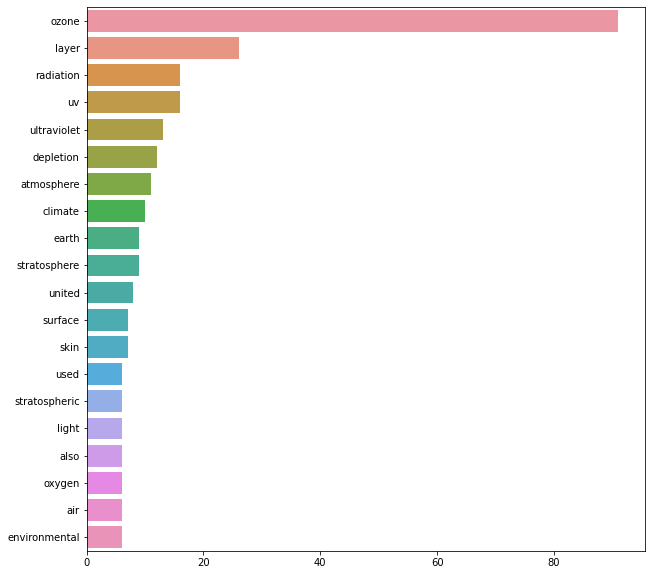

In [29]:
article_name = "Ozone layer"
data = get_content(article_name)
merge_content = merge_contents(data)
collection = tokenize(merge_content)
lower_case = lower_collection(collection)
amount_of_words = count_frequency(lower_case)

frequencies = print_most_frequent(amount_of_words, 20)

stop_words = list(stopwords.words('english'))

words = remove_stop_words(lower_case, stop_words)
amount_of_removed_words = count_frequency(words)
frequencies_of_removed = print_most_frequent(amount_of_removed_words, 20)
creating_hist(frequencies_of_removed)
